In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import joblib


In [2]:
dataframe=pd.read_csv("./Train_Test_Windows_10.csv")

In [3]:
dataframe.head(10)

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,0,49.07244938,0,0.779671928,0,21.830814,49.07244938,45.5788994,405.2109934,0.155934386,...,0.035543669,0.035727836,0.006138575,980725.4671,61.12065428,16125.91191,1.184788963,0.000584015,1,dos
1,17,0,0,1.170522789,0,38.15904291,0,100,0,2.41908043,...,0.071868506,0.113428645,1.38968492,695437.4911,56.84042385,17923.5993,2.403132421,0.001995776,1,dos
2,11,0,0,0.546510062,0,65.1127703,0,100,0,0.312291464,...,0.010271601,0.023255341,0.432790999,691341.4197,9.388015072,86462.6383,0.342387367,0.002475624,1,dos
3,0,0,0,0.78081667,0,68.94611198,0,100,0,1.015061671,...,0.062088903,0.070302274,0.273779061,1039903.208,81.89439351,13206.97436,2.069629418,0.000858868,1,dos
4,0,0,0,0.468739969,0,66.0142123,0,100,0,0.156246656,...,0.100304043,0.123923448,0.787313151,2498188.869,190.1717481,15214.36803,3.34346845,0.000651557,1,dos
5,0,0,0,0.850670758,0,72.30701444,0,100,0,0.077333705,...,0.004767983,0.012070027,0.243401465,284270.6052,7.227312748,42271.56164,0.158932767,0.001670347,1,dos
6,2,0,0,1.718765039,0,57.73488018,0,100,0,0.781256836,...,0.185050279,0.287074862,3.400818757,2605890.835,340.00204,14482.07059,6.168342973,0.00084433,1,dos
7,1,0,0,1.953685004,0,53.21837952,0,100,0,0.547031801,...,0.270206362,0.369339437,3.304436184,2656634.863,353.5049167,12440.55688,9.006878732,0.001044804,1,dos
8,2,0,0,1.642300541,0,51.22413591,0,100,0,1.32948139,...,0.151404359,0.197130981,1.524221071,1319853.812,198.002737,11618.87968,5.046811959,0.000995601,1,dos
9,5,0,0,2.110519704,0,52.76299259,0,100,0,0.859841361,...,0.198902501,0.228856577,0.998468549,910622.4899,111.3600799,11956.78706,6.630083024,0.002055098,1,dos


<Axes: ylabel='type'>

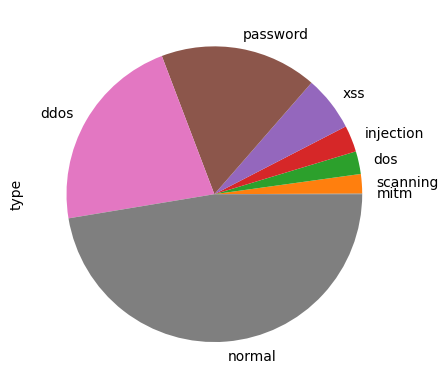

In [4]:
dataframe.type.value_counts().sort_values().plot(kind="pie")

In [5]:
dataframe= dataframe.drop("type", axis=1)

In [6]:
print(dataframe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Columns: 125 entries, Processor_DPC_Rate to label
dtypes: float64(5), int64(51), object(69)
memory usage: 20.1+ MB
None


In [7]:
# Tüm sütunları float64'e dönüştür
dataframe = dataframe.apply(pd.to_numeric, errors='coerce', axis=1)

# Sonucu kontrol et
print(dataframe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Columns: 125 entries, Processor_DPC_Rate to label
dtypes: float64(125)
memory usage: 20.1 MB
None


In [8]:
# 'label' sütununun diğer sütunlarla korelasyonları
correlations = dataframe.corr()['label']

# NaN değerlere sahip sütunları filtrele
columns_to_drop = correlations[correlations.isna()].index

# NaN değerlere sahip sütunları DataFrame'den çıkar
dataframe = dataframe.drop(columns=columns_to_drop, axis=1)


dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Columns: 106 entries, Processor_DPC_Rate to label
dtypes: float64(106)
memory usage: 17.1 MB


In [9]:
toplam=0
pozort=0
poztop=0
pozi=0
negtop=0
negort=0
negi=0
# 'label' sütununun diğer sütunlarla korelasyonları
correlations = dataframe.corr()['label']

# Tüm sütun adlarını ve ilişkili korelasyon değerlerini ekrana yazdır
for column, correlation in correlations.items():
    print(f"{column}: {correlation}")

    if 0.3052701147994894 > correlation > 0:
        pozort=pozort+correlation
        pozi=pozi+1
        poztop=poztop+correlation

    elif correlation < 0 and correlation >= -0.10585134837663442:
        negort=negort+correlation
        negi=negi+1
        negtop=negtop+correlation


    toplam =toplam+correlation

# 'label' sütununun diğer sütunlarla korelasyonları

# Korelasyon değerlerinin ortalamasını hesapla
correlation_mean = correlations.mean()

correlation_std = correlations.std()



# Pozitif ve negatif korelasyon değerlerini içeren sütunları seç
positive_correlations = correlations[correlations > 0]
negative_correlations = correlations[correlations < 0]

positive_correlations = positive_correlations.std()
negative_correlations= negative_correlations.std()

# Ortalamayı ekrana yazdır
print(f"\nİlişkili korelasyon değerlerinin ortalaması: {correlation_mean}")
print(f"toplam ortlama {toplam/106}")
print(f"Negatif degerler ortalaması {negort/negi}")
print(f"Pozitif degerler ortalaması {pozort/pozi}")
print(f"Toplam pozitif sayısı {pozi}")
print(f"Toplam neg sayısı {negi}")
print(f"Pozitif Toplam {poztop}")
print(f"Negatif Toplam {negtop}")
print(f"stardart sapma ortlama degerler için {correlation_std}")
print(f"Pozitif değerler için standart sapma: {positive_correlations}")
print(f"Negatif değerler için standart sapma: {negative_correlations*-1}")


Processor_DPC_Rate: -0.2309953856679726
Processor_pct_ Idle_Time: 0.10796187028911204
Processor_pct_ Interrupt_Time: 0.1415698852577002
Processor_pct_ User_Time: -0.2277436964144173
Processor_pct_ C1_Time: 0.10796187028911204
Processor_pct_ Processor_Time: -0.09070938294215804
Processor_C1_ransitions_sec: -0.28787150030997494
Processor_pct_ DPC_Time: 0.009846011744122054
Processor_pct_ Privileged_Time: 0.12384900428082046
Processor_DPCs_Queued_sec: -0.2753235692899213
Processor_Interrupts_sec: -0.3517386432612907
Process_Pool_Paged Bytes: 0.8445631089610803
Process_IO Read_Operations_sec: -0.009595382161816901
Process_Working_Set_ Private: -0.11811936375761535
Process_Working_Set_Peak: -0.07057944020293022
Process_IO_Write Operations_sec: -0.005621463188536951
Process_Page_File Bytes: -0.12703674646117546
Process_pct_ User_Time: -0.22889233217263588
Process_Virtual_Bytes Peak: 0.9723314611390258
Process_Page_File Bytes Peak: -0.30360297156436583
Process_IO_Other_Bytes_sec: -0.071454082

<Axes: >

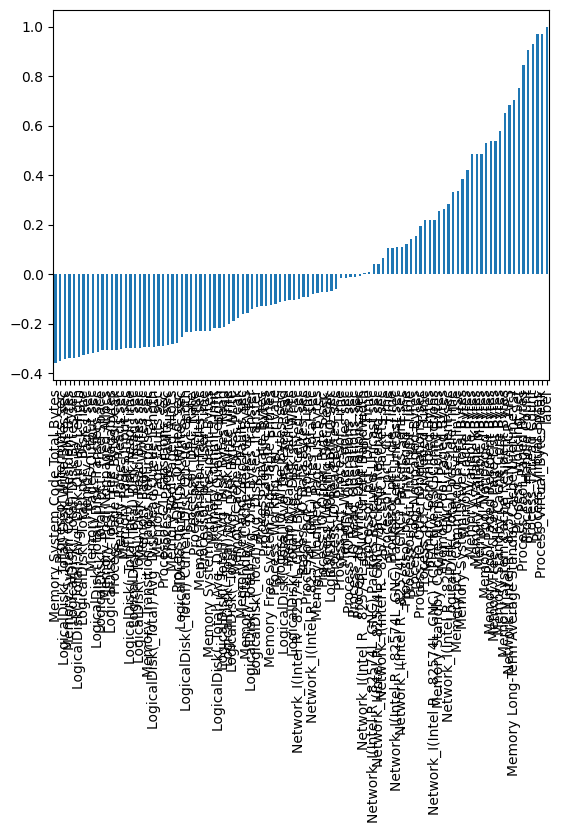

In [10]:


correlations.sort_values().plot(kind="bar")


In [11]:
# 'label' sütununun diğer sütunlarla korelasyonları
columns_add = []
for column, correlation in correlations.items():
    if 0 < correlation < 0.3052701147994894:
        columns_add.append(column)
        print(f"stunadı {column} degeri{correlation}")
    elif -0.10585134837663442 <= correlation < 0:
        columns_add.append(column)
        print(f"stunadı {column} degeri{correlation}")
        


columns_add.append("label")

# Seçilen sütunları DataFrame'den al
dataframe_selected = dataframe[columns_add]

# Yeni DataFrame'in bilgilerini yazdır
print(dataframe_selected.info())



stunadı Processor_pct_ Idle_Time degeri0.10796187028911204
stunadı Processor_pct_ Interrupt_Time degeri0.1415698852577002
stunadı Processor_pct_ C1_Time degeri0.10796187028911204
stunadı Processor_pct_ Processor_Time degeri-0.09070938294215804
stunadı Processor_pct_ DPC_Time degeri0.009846011744122054
stunadı Processor_pct_ Privileged_Time degeri0.12384900428082046
stunadı Process_IO Read_Operations_sec degeri-0.009595382161816901
stunadı Process_Working_Set_Peak degeri-0.07057944020293022
stunadı Process_IO_Write Operations_sec degeri-0.005621463188536951
stunadı Process_IO_Other_Bytes_sec degeri-0.07145408259938027
stunadı Process_pct_ Processor_Time degeri-0.014262770154343879
stunadı Process_Pool Nonpaged Bytes degeri0.15471712206958557
stunadı Process_IO Other Operations_sec degeri0.19394196002679215
stunadı Process_IO Data Operations_sec degeri-0.009698023294564507
stunadı Process_pct_ Privileged_Time degeri0.21775478084929736
stunadı Process_IO Data Bytes_sec degeri-0.0912408123

<Axes: >

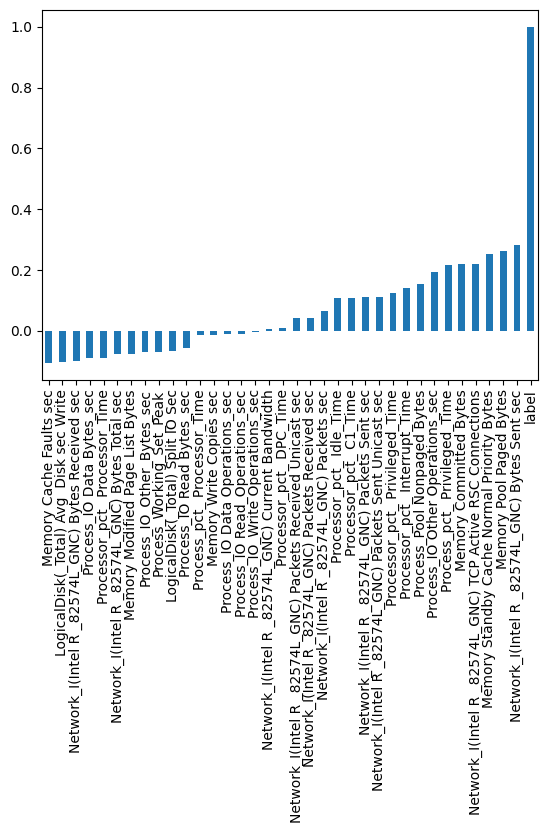

In [12]:
correlations = dataframe_selected.corr()['label']
correlations.sort_values().plot(kind="bar")


<Axes: xlabel='label', ylabel='count'>

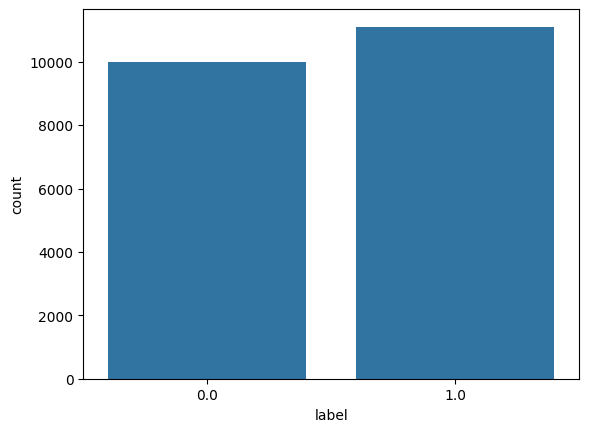

In [13]:
sns.countplot(x="label",data=dataframe_selected)

In [14]:
dataframe_selected = dataframe_selected.fillna(0)

In [15]:
X = dataframe_selected.drop(["label"], axis=1).values
y = dataframe_selected["label"].values

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.30)

print(f"traine ayrılan {len(X_train)}")
print(f"teste ayrılan {len(X_test)}")

traine ayrılan 14772
teste ayrılan 6332


In [17]:
X_train.shape

(14772, 35)

In [18]:
y_train.shape

(14772,)

In [19]:
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

c:\Users\Alperen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [21]:
from catboost import CatBoostClassifier

# CatBoost modelini oluştur
catboost_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', cat_features=[], early_stopping_rounds=50)

# Modeli eğit
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)

# Modeli değerlendir
catboost_pred = catboost_model.predict(X_test)

joblib.dump(catboost_model, 'Iot_model_ikili.pkl')


0:	learn: 0.4491306	test: 0.4513562	best: 0.4513562 (0)	total: 150ms	remaining: 2m 30s
100:	learn: 0.0005330	test: 0.0012312	best: 0.0012312 (100)	total: 959ms	remaining: 8.54s
200:	learn: 0.0004691	test: 0.0011060	best: 0.0011060 (163)	total: 1.67s	remaining: 6.63s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.001105969884
bestIteration = 163

Shrink model to first 164 iterations.


['Iot_model_ikili.pkl']

In [22]:
import lightgbm as lgb

# LightGBM modelini oluşturma
lgb_model = lgb.LGBMClassifier(n_estimators=1000)  # 1000 ağaçlık bir model oluşturuyoruz, ancak erken durdurma ile eğitimi kontrol edeceğiz
eval_set = [(X_test, y_test)]  # Doğrulama seti (validation set) tanımlama
lgb_model.fit(X_train, y_train, eval_metric='logloss', eval_set=eval_set,
              callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=False)])

# Eğitim sonucunda en iyi iterasyonu bulma
best_iteration = lgb_model.best_iteration_

# Tahmin yapma
lgb_pred = lgb_model.predict(X_test, num_iteration=best_iteration)

[LightGBM] [Info] Number of positive: 7817, number of negative: 6955
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8452
[LightGBM] [Info] Number of data points in the train set: 14772, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529177 -> initscore=0.116840
[LightGBM] [Info] Start training from score 0.116840


In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision_weighted = precision_score(y_true, y_pred, average='weighted')
    recall_weighted = recall_score(y_true, y_pred, average='weighted')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"{model_name} Model:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision (Weighted): {precision_weighted}")
    print(f"Recall (Weighted): {recall_weighted}")
    print(f"F1 Score (Weighted): {f1_weighted}")
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"ROC AUC: {roc_auc}")    
    print("Confusion Matrix:")
    print(cm)
    print("\n")




In [24]:
evaluate_model(y_test, logreg_pred, "Logistic Regression")
evaluate_model(y_test, svm_pred, "Support Vector Machine")
evaluate_model(y_test, catboost_pred, "CatBoost")
evaluate_model(y_test, lgb_pred, "LightGBM")


Logistic Regression Model:


Accuracy: 0.85028427037271
Precision (Weighted): 0.8521711789671245
Recall (Weighted): 0.85028427037271
F1 Score (Weighted): 0.8497995494474909
ROC AUC: 0.8485057571175296
Confusion Matrix:
[[2442  603]
 [ 345 2942]]


Support Vector Machine Model:
Accuracy: 0.7964308275426406
Precision (Weighted): 0.8123163125429498
Recall (Weighted): 0.7964308275426406
F1 Score (Weighted): 0.7949056008806604
ROC AUC: 0.8002494276352632
Confusion Matrix:
[[2741  304]
 [ 985 2302]]


CatBoost Model:
Accuracy: 0.9998420720151611
Precision (Weighted): 0.9998421200467865
Recall (Weighted): 0.9998420720151611
F1 Score (Weighted): 0.9998420710565916
ROC AUC: 0.9998357963875205
Confusion Matrix:
[[3044    1]
 [   0 3287]]


LightGBM Model:
Accuracy: 0.9998420720151611
Precision (Weighted): 0.9998421200467865
Recall (Weighted): 0.9998420720151611
F1 Score (Weighted): 0.9998420710565916
ROC AUC: 0.9998357963875205
Confusion Matrix:
[[3044    1]
 [   0 3287]]




In [25]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

c:\Users\Alperen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy LogisticRegression 85.58759815867857  Test Accuracy LogisticRegression 85.028427037271
Training Precesion LogisticRegression 84.31467181467181  Test Precesion LogisticRegression 82.9901269393512
Training Recall LogisticRegression 89.39490853268516  Test Recall LogisticRegression 89.50410708853057


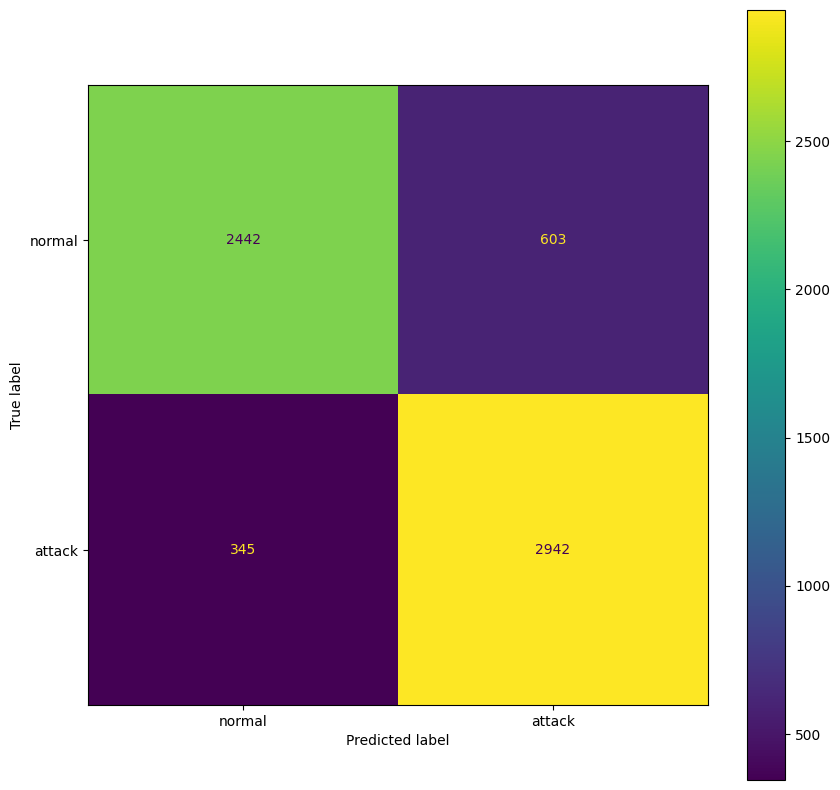

In [26]:
lg = LogisticRegression().fit(X_train, y_train)
evaluate_classification(lg, "LogisticRegression", X_train, X_test, y_train, y_test)

Training Accuracy Support Vector Machine Model 80.51042512862172  Test Accuracy Support Vector Machine Model 79.64308275426406
Training Precesion Support Vector Machine Model 89.7840799226555  Test Precesion Support Vector Machine Model 88.33461243284727
Training Recall Support Vector Machine Model 71.28054240757324  Test Recall Support Vector Machine Model 70.03346516580469


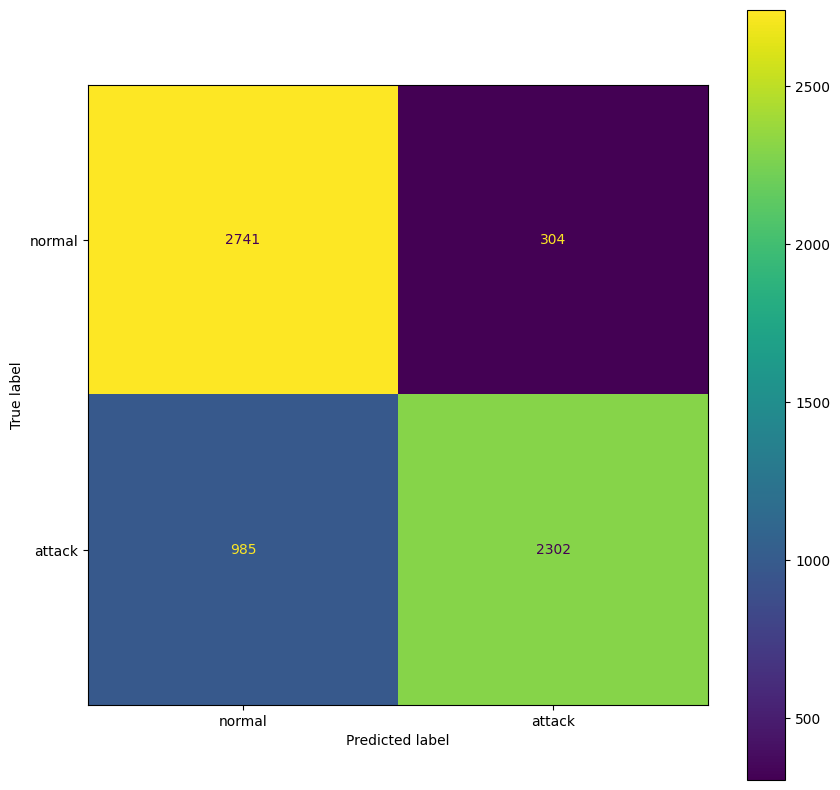

In [27]:
svm = SVC().fit(X_train, y_train)
evaluate_classification(svm, "Support Vector Machine Model", X_train, X_test, y_train, y_test)

Learning rate set to 0.03253
0:	learn: 0.6039344	total: 39.6ms	remaining: 39.6s
1:	learn: 0.5132782	total: 48ms	remaining: 23.9s
2:	learn: 0.4455040	total: 56.1ms	remaining: 18.6s
3:	learn: 0.3796601	total: 65ms	remaining: 16.2s
4:	learn: 0.3211403	total: 72.7ms	remaining: 14.5s
5:	learn: 0.2724065	total: 81.3ms	remaining: 13.5s
6:	learn: 0.2327366	total: 91.1ms	remaining: 12.9s
7:	learn: 0.2000020	total: 99.3ms	remaining: 12.3s
8:	learn: 0.1722590	total: 110ms	remaining: 12.1s
9:	learn: 0.1487721	total: 118ms	remaining: 11.7s
10:	learn: 0.1292819	total: 128ms	remaining: 11.5s
11:	learn: 0.1100568	total: 140ms	remaining: 11.6s
12:	learn: 0.0939518	total: 150ms	remaining: 11.4s
13:	learn: 0.0811498	total: 158ms	remaining: 11.1s
14:	learn: 0.0702435	total: 166ms	remaining: 10.9s
15:	learn: 0.0610553	total: 174ms	remaining: 10.7s
16:	learn: 0.0535504	total: 182ms	remaining: 10.5s
17:	learn: 0.0467538	total: 189ms	remaining: 10.3s
18:	learn: 0.0412104	total: 198ms	remaining: 10.2s
19:	lear

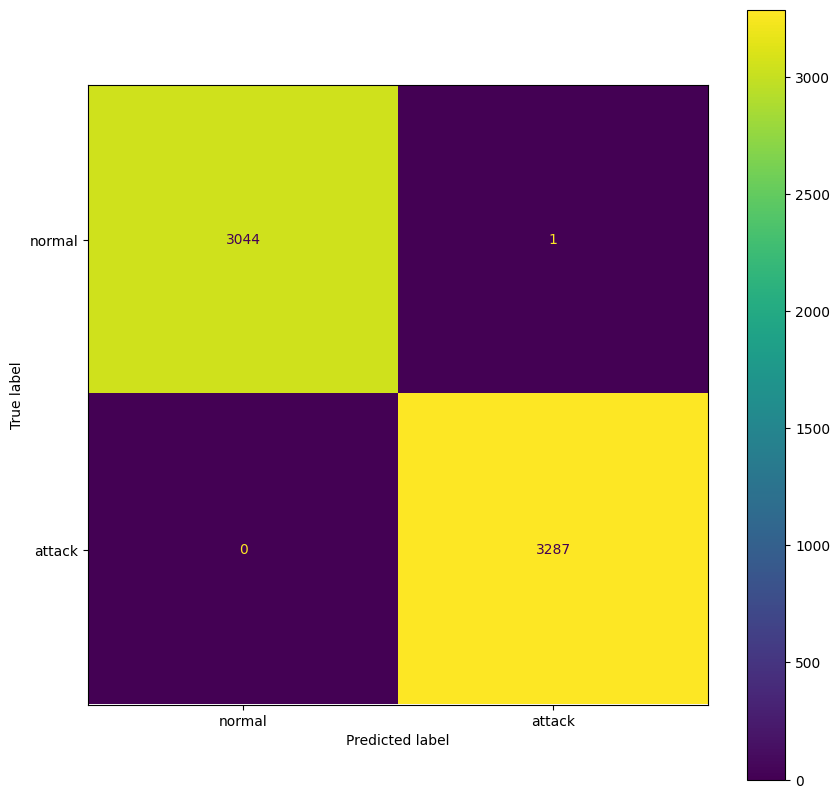

In [27]:
catb = CatBoostClassifier().fit(X_train, y_train)
evaluate_classification(catb, "Cat Boost Machine Model", X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 7817, number of negative: 6955
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8452
[LightGBM] [Info] Number of data points in the train set: 14772, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529177 -> initscore=0.116840
[LightGBM] [Info] Start training from score 0.116840
Training Accuracy LGBM Model 100.0  Test Accuracy LGBM Model 99.98420720151611
Training Precesion LGBM Model 100.0  Test Precesion LGBM Model 99.96958637469587
Training Recall LGBM Model 100.0  Test Recall LGBM Model 100.0


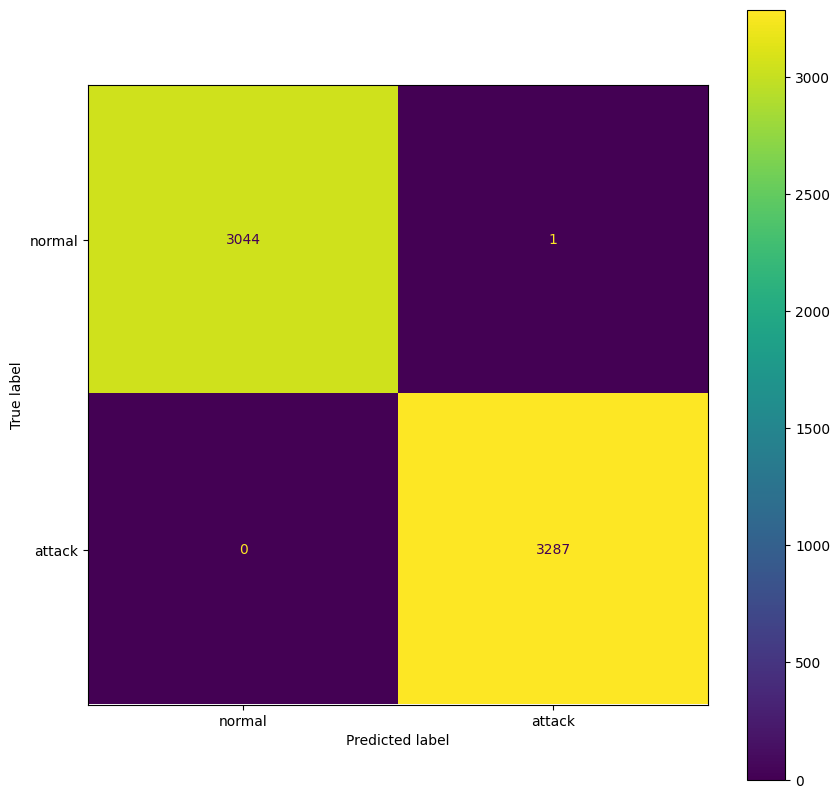

In [28]:
lgbm = lgb.LGBMClassifier().fit(X_train, y_train)
evaluate_classification(lgbm, "LGBM Model", X_train, X_test, y_train, y_test)